# **DATA EXPLORATION**

# Import libraries

In [173]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats.mstats import winsorize

# Import Data

In [174]:
# Load each sheet into separate DataFrames
# Define the file path in Google Drive
file_path = 'Dataset2_Needs.xls'

# Load each sheet into separate DataFrames
needs_df = pd.read_excel(file_path, sheet_name='Needs')
products_df = pd.read_excel(file_path, sheet_name='Products')
metadata_df = pd.read_excel(file_path, sheet_name='Metadata')

In [175]:
needs_df.head()

,ID,Age,Gender,FamilyMembers,FinancialEducation,RiskPropensity,Income,Wealth,IncomeInvestment,AccumulationInvestment
0,1,60,0,2,0.228685,0.233355,68.181525,53.260067,0,1
1,2,78,0,2,0.358916,0.170911,21.807595,135.550048,1,0
2,3,33,1,2,0.317515,0.249703,23.252747,66.303678,0,1
3,4,69,1,4,0.767685,0.654597,166.189034,404.997689,1,1
4,5,58,0,3,0.429719,0.349039,21.186723,58.911930,0,0


# First insight

In [176]:
# Let's see the actual variables names in metadata_df
print("Metadata DataFrame columns:")
print(metadata_df.columns.tolist())

# Let's peek at the first few rows
print("\nFirst few rows of metadata:")
print(metadata_df.head())

Metadata DataFrame columns:
['Metadata', 'Unnamed: 1']

First few rows of metadata:
        Metadata                     Unnamed: 1
0        Clients                            NaN
1             ID                   Numerical ID
2            Age                  Age, in years
3         Gender  Gender (Female = 1, Male = 0)
4  FamilyMembers           Number of components


In [177]:
# Drop ID column as it's not needed for analysis
needs_df = needs_df.drop('ID', axis=1)

In [178]:
def create_variable_summary(df, metadata_df):
    # Create empty lists to store the chosen statistics
    stats_dict = {
        'Variable': [],
        'Description': [],
        'Mean': [],
        'Std': [],
        'Missing': [],
        'Min': [],
        'Max': []
    }

    # Create a metadata dictionary for easy lookup
    meta_dict = dict(zip(metadata_df['Metadata'], metadata_df['Unnamed: 1']))

    for col in df.columns:
        stats_dict['Variable'].append(col)
        stats_dict['Description'].append(meta_dict.get(col, 'N/A'))

        # Calculate some statistics for each column
        if pd.api.types.is_numeric_dtype(df[col]):
            stats_dict['Mean'].append(f"{df[col].mean():.2f}")
            stats_dict['Std'].append(f"{df[col].std():.2f}")
            stats_dict['Min'].append(f"{df[col].min():.2f}")
            stats_dict['Max'].append(f"{df[col].max():.2f}")
        else:
            stats_dict['Mean'].append('N/A')
            stats_dict['Std'].append('N/A')
            stats_dict['Min'].append('N/A')
            stats_dict['Max'].append('N/A')

        stats_dict['Missing'].append(df[col].isna().sum())

    return pd.DataFrame(stats_dict)


# Create summary tables
print("NEEDS VARIABLES SUMMARY:")
needs_summary = create_variable_summary(needs_df, metadata_df)
display(needs_summary.style
        .set_properties(**{'text-align': 'left'})
        .hide(axis='index'))

print("\nPRODUCTS VARIABLES SUMMARY:")
products_summary = create_variable_summary(products_df, metadata_df)
display(products_summary.style
        .set_properties(**{'text-align': 'left'})
        .hide(axis='index'))


NEEDS VARIABLES SUMMARY:


Variable,Description,Mean,Std,Missing,Min,Max
Age,"Age, in years",55.25,11.97,0,18.00,97.00
Gender,"Gender (Female = 1, Male = 0)",0.49,0.50,0,0.00,1.00
FamilyMembers,Number of components,2.51,0.76,0,1.00,5.00
FinancialEducation,Normalized level of Financial Education (estimate),0.42,0.15,0,0.04,0.90
RiskPropensity,Normalized Risk propensity from MIFID profile,0.36,0.15,0,0.02,0.88
Income,Income (thousands of euros); estimate,62.99,44.36,0,1.54,365.32
Wealth,Wealth (thousands of euros); sum of investments and cash accounts,93.81,105.47,0,1.06,2233.23
IncomeInvestment,Boolean variable for Income investment; 1 = High propensity,0.38,0.49,0,0.00,1.00
AccumulationInvestment,Boolean variable for Accumulation/growth investment; 1 = High propensity,0.51,0.50,0,0.00,1.00



PRODUCTS VARIABLES SUMMARY:


Variable,Description,Mean,Std,Missing,Min,Max
IDProduct,Product description,6.00,3.32,0,1.00,11.00
Type,"1 = Accumulation product, 0 = Income product",0.64,0.50,0,0.00,1.00
Risk,Normalized Synthetic Risk Indicator,0.43,0.24,0,0.12,0.88


# Separate categorical and numerical

In [179]:
columns_categorical = ["Gender"]
columns_numerical = ["Age", "FamilyMembers", "FinancialEducation", "RiskPropensity", "Income ", "Wealth"]

needs_categorical = needs_df[columns_categorical]
needs_numerical = needs_df[columns_numerical]

In [180]:
needs_df = needs_df.drop('Gender', axis=1)

# Outliers

## Histograms

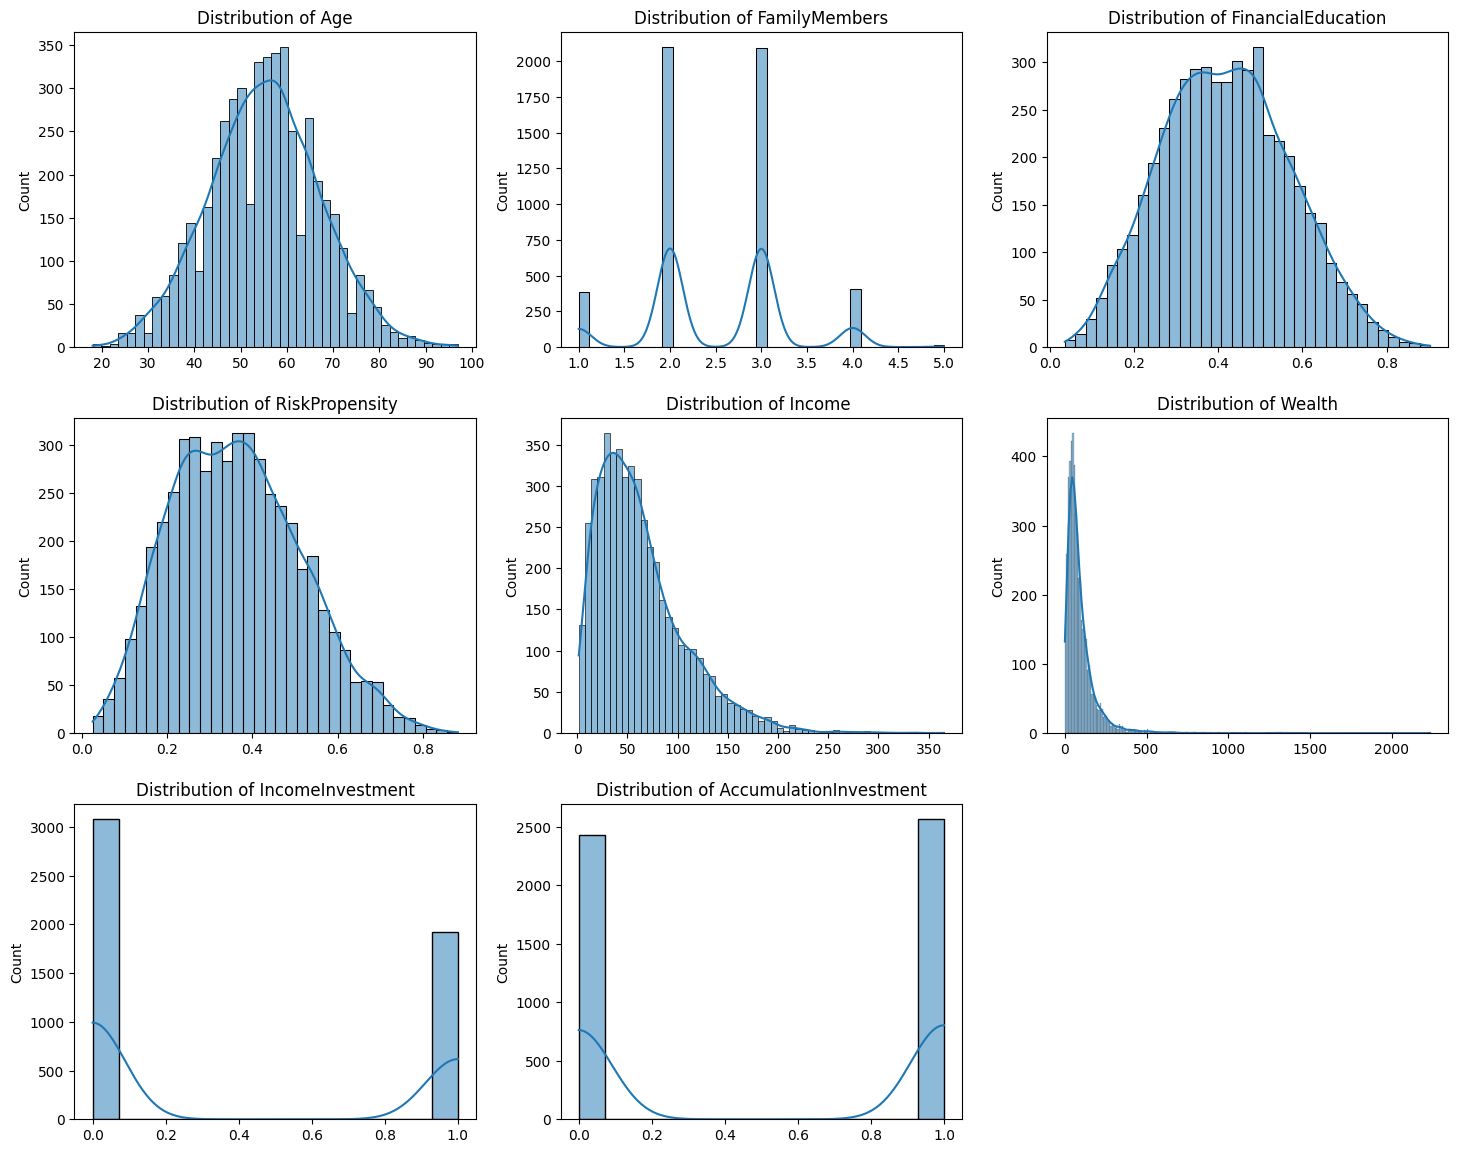

In [181]:
# Set up the subplot grid
n_cols = 3  # Number of columns in the grid
n_rows = (len(needs_df.columns) - 1) // n_cols + 1

# Create figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*4))
fig.tight_layout(pad=3.0)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each feature
for i, column in enumerate(needs_df.columns):
    sns.histplot(needs_df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel('')
    
# Hide any empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

## Wealth and Income

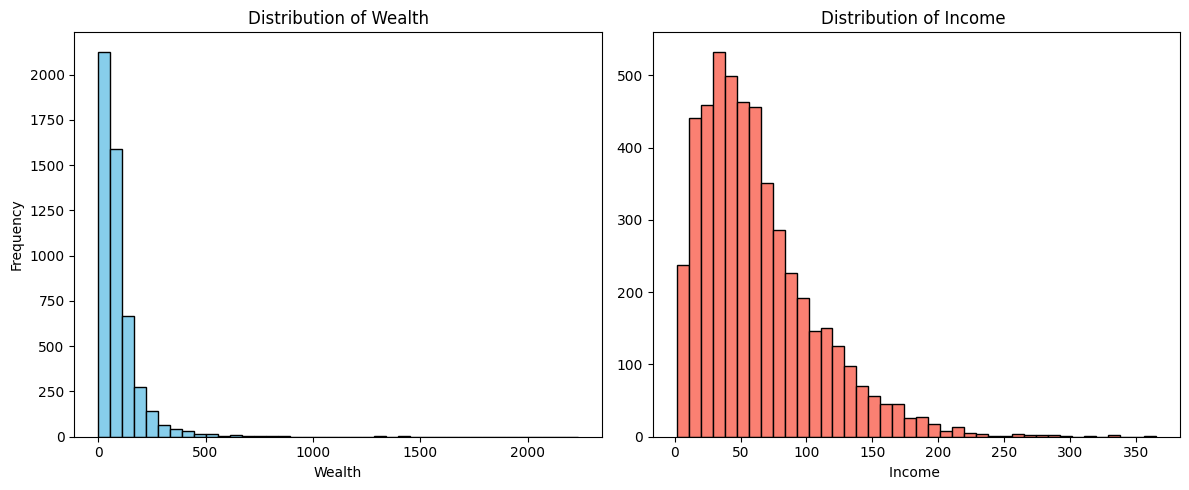

In [182]:
# Select your two columns
col1 = 'Wealth'  # Replace with your first column name
col2 = 'Income '  # Replace with your second column name
n_bins = 40

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot histograms
axes[0].hist(needs_df[col1], bins=n_bins, color='skyblue', edgecolor='black')
axes[0].set_title(f'Distribution of {col1}')
axes[0].set_xlabel(col1)
axes[0].set_ylabel('Frequency')

axes[1].hist(needs_df[col2], bins=n_bins, color='salmon', edgecolor='black')
axes[1].set_title(f'Distribution of {col2}')
axes[1].set_xlabel(col2)

plt.tight_layout()
plt.show()

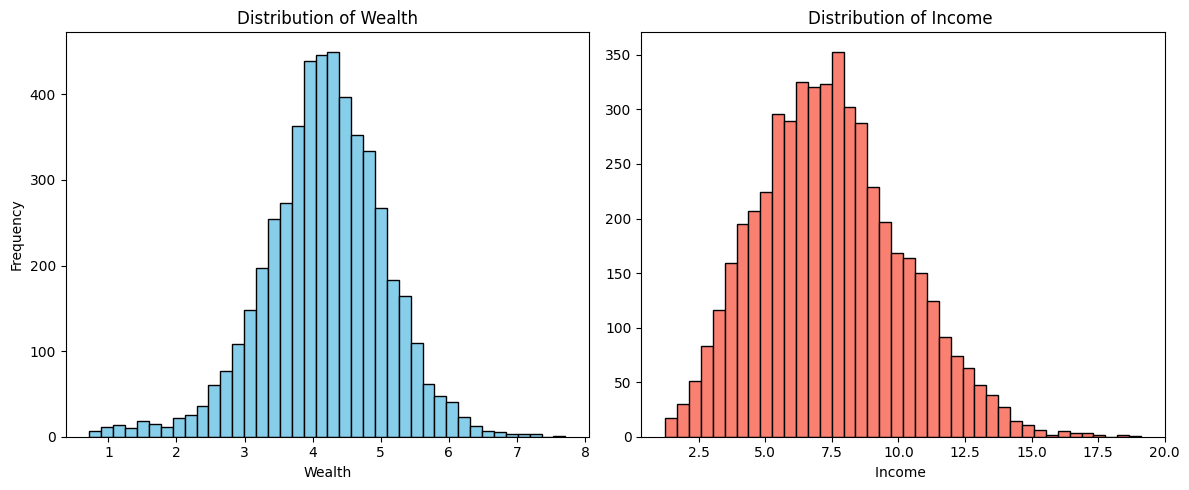

In [183]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot histograms
axes[0].hist(np.log1p(needs_df[col1]), bins=n_bins, color='skyblue', edgecolor='black')
axes[0].set_title(f'Distribution of {col1}')
axes[0].set_xlabel(col1)
axes[0].set_ylabel('Frequency')

axes[1].hist(np.sqrt(needs_df[col2]), bins=n_bins, color='salmon', edgecolor='black')
axes[1].set_title(f'Distribution of {col2}')
axes[1].set_xlabel(col2)

plt.tight_layout()
plt.show()

In [184]:
# Transform the data
needs_transformed = needs_df.copy()
needs_transformed[col1] = np.log1p(needs_df[col1])
needs_transformed[col2] = np.sqrt(needs_df[col2])


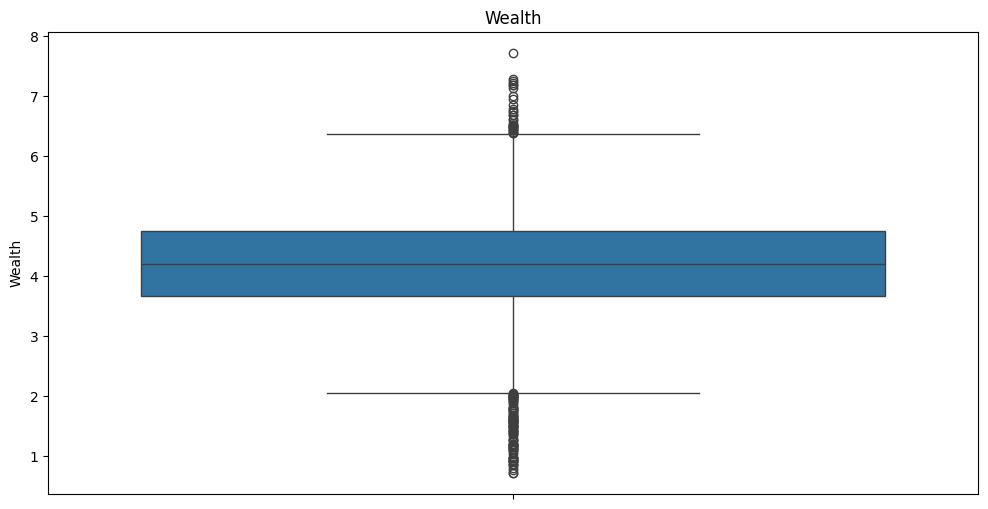

In [185]:
# Plot boxplots for all numeric columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=needs_transformed["Wealth"])
plt.xticks(rotation=45)
plt.title("Wealth")
plt.show()

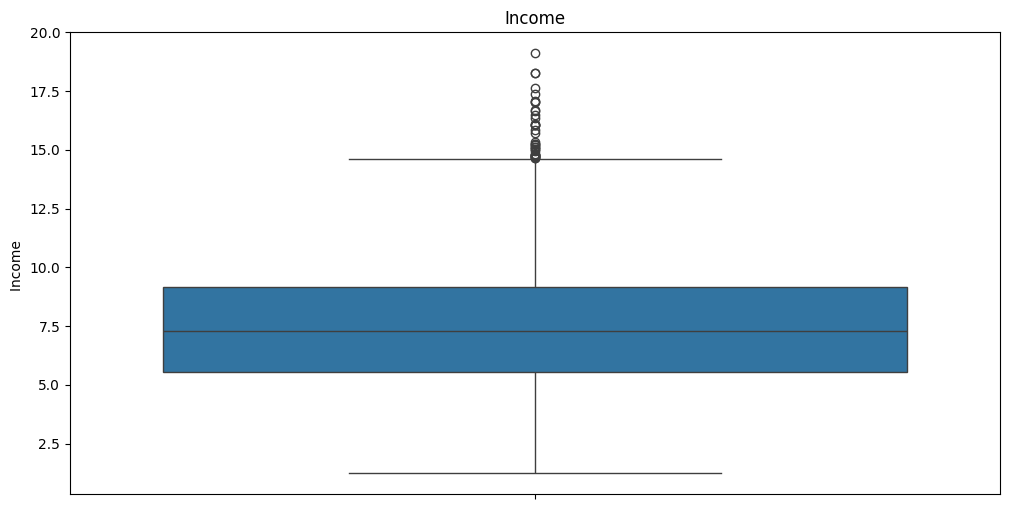

In [186]:
# Plot boxplots for all numeric columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=needs_transformed["Income "])
plt.xticks(rotation=45)
plt.title("Income")
plt.show()

In [187]:
# Calculate IQR for each numeric column
numeric_cols = needs_df.select_dtypes(include=['float64', 'int64']).columns
outliers = {}

for col in numeric_cols:
    Q1 = needs_df[col].quantile(0.25)
    Q3 = needs_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = needs_df[(needs_df[col] < lower_bound) | (needs_df[col] > upper_bound)].index.tolist()

# Display outlier counts
for col, idx in outliers.items():
    print(f"{col}: {len(idx)} outliers")

Age: 29 outliers
FamilyMembers: 11 outliers
FinancialEducation: 8 outliers
RiskPropensity: 10 outliers
Income : 166 outliers
Wealth: 317 outliers
IncomeInvestment: 0 outliers
AccumulationInvestment: 0 outliers


In [188]:
# Calculate IQR for each numeric column
numeric_cols = needs_transformed.select_dtypes(include=['float64', 'int64']).columns
outliers = {}

for col in numeric_cols:
    Q1 = needs_transformed[col].quantile(0.2)
    Q3 = needs_transformed[col].quantile(0.8)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = needs_transformed[(needs_transformed[col] < lower_bound) | (needs_transformed[col] > upper_bound)].index.tolist()

# Display outlier counts
for col, idx in outliers.items():
    print(f"{col}: {len(idx)} outliers")

Age: 3 outliers
FamilyMembers: 11 outliers
FinancialEducation: 0 outliers
RiskPropensity: 0 outliers
Income : 10 outliers
Wealth: 55 outliers
IncomeInvestment: 0 outliers
AccumulationInvestment: 0 outliers


In [189]:
# Clip values to upper/lower bounds
for col in ["Income "]:
    Q1 = needs_transformed[col].quantile(0.25)
    Q3 = needs_transformed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    needs_transformed[col] = needs_transformed[col].clip(0, upper_bound)

for col in ["Wealth"]:
    Q1 = needs_transformed[col].quantile(0.25)
    Q3 = needs_transformed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    needs_transformed[col] = needs_transformed[col].clip(lower_bound*0.5, upper_bound)

In [190]:
# Calculate IQR for each numeric column
numeric_cols = needs_transformed.select_dtypes(include=['float64', 'int64']).columns
outliers = {}

for col in numeric_cols:
    Q1 = needs_transformed[col].quantile(0.2)
    Q3 = needs_transformed[col].quantile(0.8)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = needs_transformed[(needs_transformed[col] < lower_bound) | (needs_transformed[col] > upper_bound)].index.tolist()

# Display outlier counts
for col, idx in outliers.items():
    print(f"{col}: {len(idx)} outliers")

Age: 3 outliers
FamilyMembers: 11 outliers
FinancialEducation: 0 outliers
RiskPropensity: 0 outliers
Income : 0 outliers
Wealth: 46 outliers
IncomeInvestment: 0 outliers
AccumulationInvestment: 0 outliers


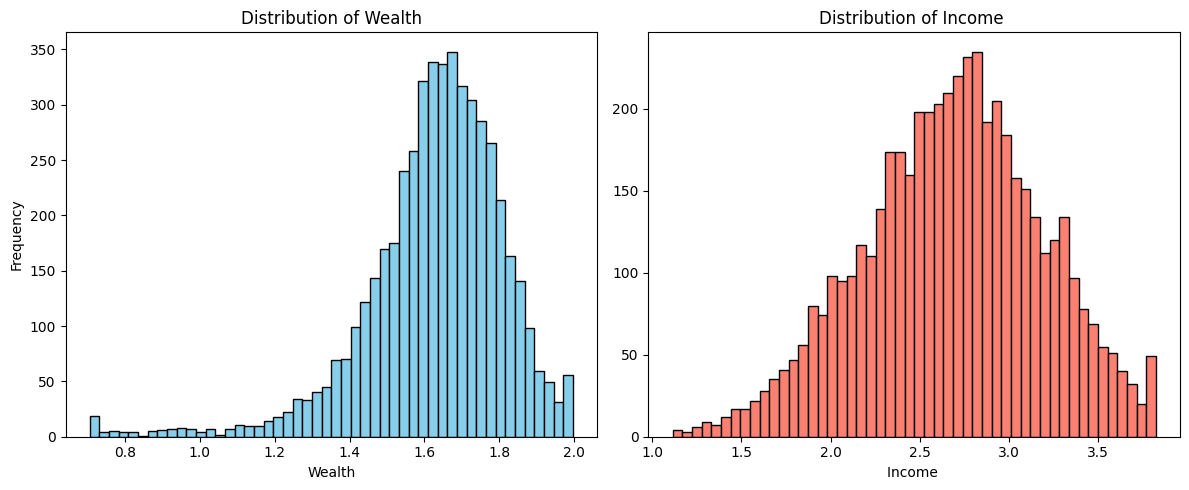

In [191]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot histograms
axes[0].hist(np.log1p(needs_transformed[col1]), bins=50, color='skyblue', edgecolor='black')
axes[0].set_title(f'Distribution of {col1}')
axes[0].set_xlabel(col1)
axes[0].set_ylabel('Frequency')

axes[1].hist(np.sqrt(needs_transformed[col2]), bins=50, color='salmon', edgecolor='black')
axes[1].set_title(f'Distribution of {col2}')
axes[1].set_xlabel(col2)

plt.tight_layout()
plt.show()

# Final

In [198]:
df_clients = needs_df.copy()
df_clients.head()

,Age,FamilyMembers,FinancialEducation,RiskPropensity,Income,Wealth,IncomeInvestment,AccumulationInvestment
0,60,2,0.228685,0.233355,68.181525,53.260067,0,1
1,78,2,0.358916,0.170911,21.807595,135.550048,1,0
2,33,2,0.317515,0.249703,23.252747,66.303678,0,1
3,69,4,0.767685,0.654597,166.189034,404.997689,1,1
4,58,3,0.429719,0.349039,21.186723,58.911930,0,0


## Maxence

In [199]:
df_clients['edu_risk_ratio'] = df_clients['FinancialEducation'] / df_clients['RiskPropensity']
df_clients['log_edu_risk_ratio'] = np.log1p(df_clients['edu_risk_ratio'])
df_clients['log_edu_risk_ratio_wins'] = winsorize(df_clients['log_edu_risk_ratio'], limits=[0, 0.005])

In [200]:
df_clients.head()

,Age,FamilyMembers,FinancialEducation,RiskPropensity,Income,Wealth,IncomeInvestment,AccumulationInvestment,edu_risk_ratio,log_edu_risk_ratio,log_edu_risk_ratio_wins
0,60,2,0.228685,0.233355,68.181525,53.260067,0,1,0.979988,0.683091,0.683091
1,78,2,0.358916,0.170911,21.807595,135.550048,1,0,2.100013,1.131406,1.131406
2,33,2,0.317515,0.249703,23.252747,66.303678,0,1,1.271571,0.820472,0.820472
3,69,4,0.767685,0.654597,166.189034,404.997689,1,1,1.172759,0.775998,0.775998
4,58,3,0.429719,0.349039,21.186723,58.911930,0,0,1.231150,0.802517,0.802517


In [201]:
df_clients = df_clients.drop(['log_edu_risk_ratio', 'edu_risk_ratio', "FinancialEducation", "RiskPropensity"], axis=1)

In [202]:
df_clients.head()

,Age,FamilyMembers,Income,Wealth,IncomeInvestment,AccumulationInvestment,log_edu_risk_ratio_wins
0,60,2,68.181525,53.260067,0,1,0.683091
1,78,2,21.807595,135.550048,1,0,1.131406
2,33,2,23.252747,66.303678,0,1,0.820472
3,69,4,166.189034,404.997689,1,1,0.775998
4,58,3,21.186723,58.911930,0,0,0.802517


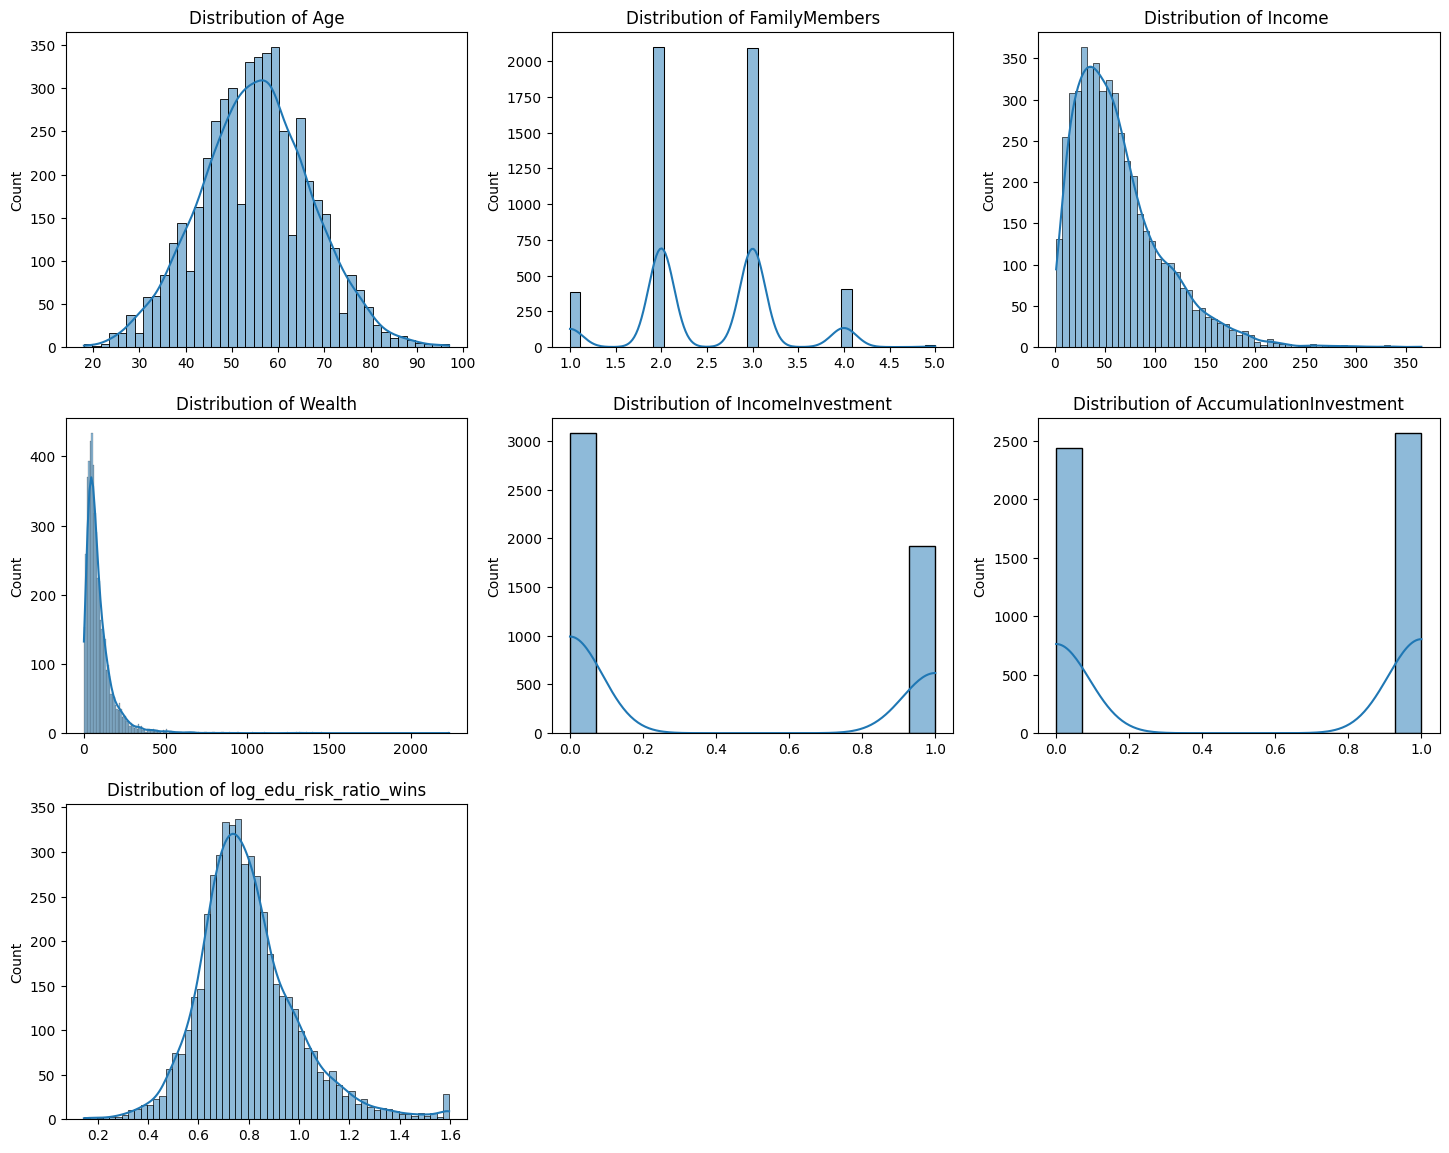

In [203]:
# Set up the subplot grid
n_cols = 3  # Number of columns in the grid
n_rows = (len(df_clients.columns) - 1) // n_cols + 1

# Create figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*4))
fig.tight_layout(pad=3.0)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each feature
for i, column in enumerate(df_clients.columns):
    sns.histplot(df_clients[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel('')
    
# Hide any empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

## Kevin

In [209]:
df_clients_transformed = df_clients.copy()
df_clients_transformed["Wealth"] = np.log1p(df_clients["Wealth"])
df_clients_transformed["Income "] = np.sqrt(df_clients["Income "])

In [210]:
# Clip values to upper/lower bounds
for col in ["Income "]:
    Q1 = df_clients_transformed[col].quantile(0.25)
    Q3 = df_clients_transformed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clients_transformed[col] = df_clients_transformed[col].clip(0, upper_bound)

for col in ["Wealth"]:
    Q1 = df_clients_transformed[col].quantile(0.25)
    Q3 = df_clients_transformed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clients_transformed[col] = df_clients_transformed[col].clip(lower_bound*0.5, upper_bound)

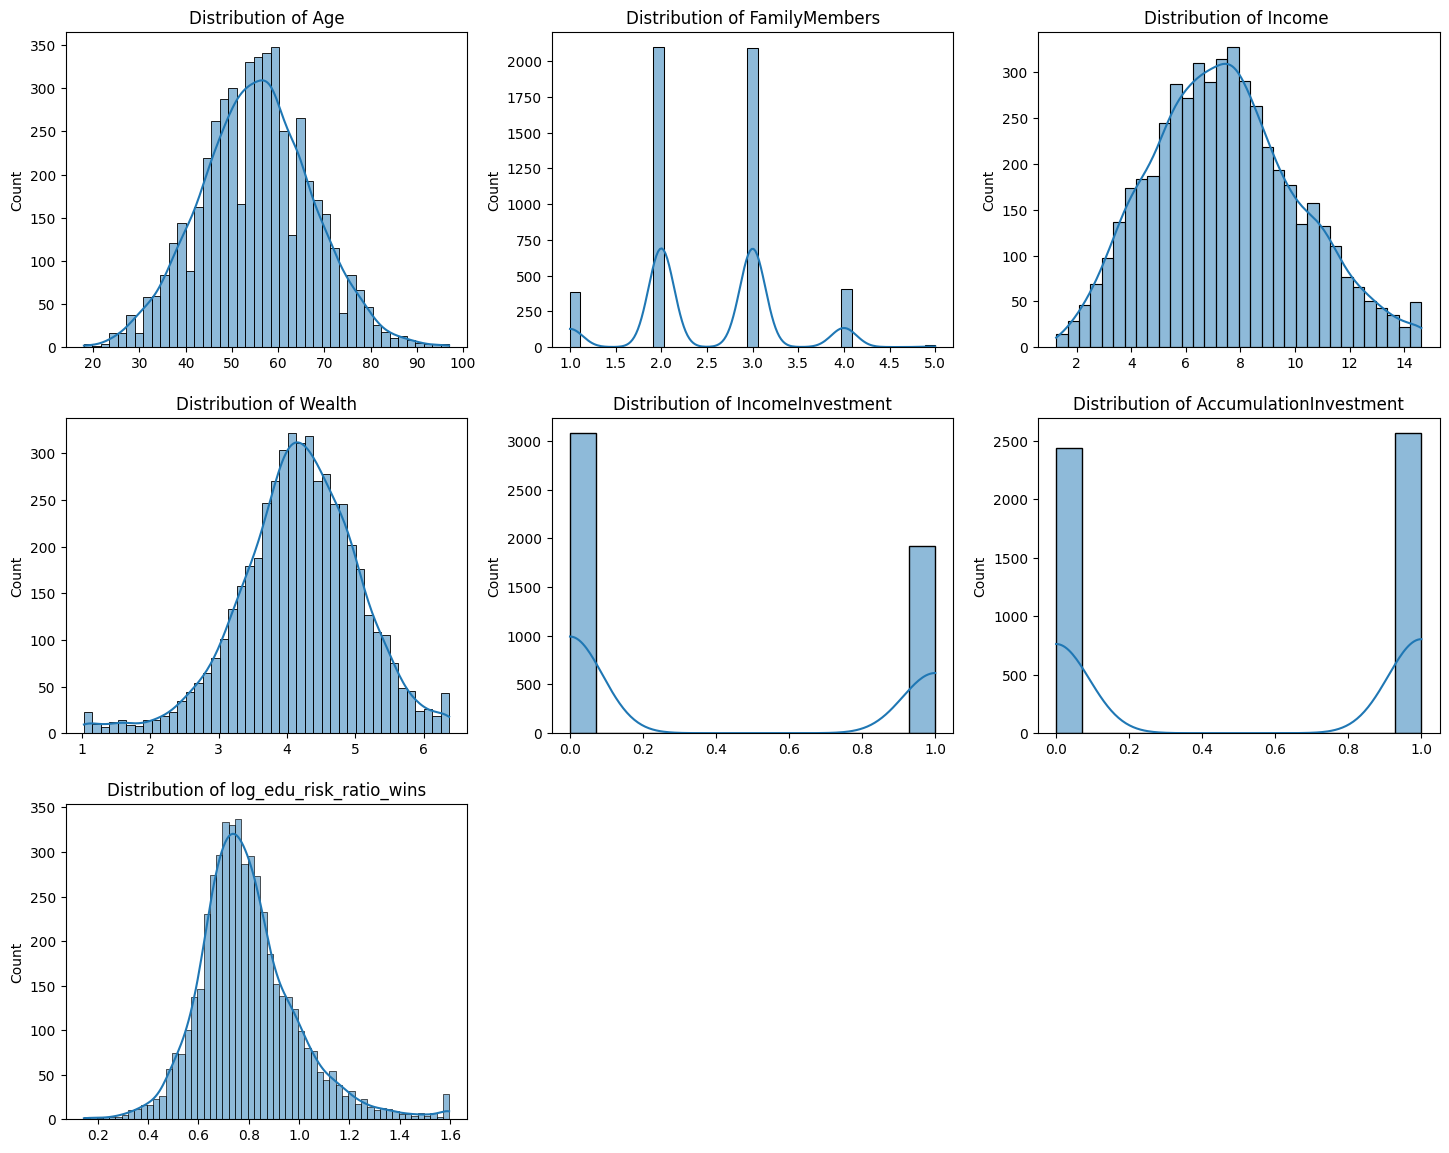

In [211]:
# Set up the subplot grid
n_cols = 3  # Number of columns in the grid
n_rows = (len(df_clients_transformed.columns) - 1) // n_cols + 1

# Create figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*4))
fig.tight_layout(pad=3.0)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each feature
for i, column in enumerate(df_clients_transformed.columns):
    sns.histplot(df_clients_transformed[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel('')
    
# Hide any empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

In [212]:
df_clients_transformed["Income_to_Wealth"] = df_clients_transformed["Income "] / df_clients_transformed["Wealth"]
df_clients_transformed = df_clients_transformed.drop(["Income ", "Wealth"], axis = 1)

In [213]:
df_clients_transformed.head()

,Age,FamilyMembers,IncomeInvestment,AccumulationInvestment,log_edu_risk_ratio_wins,Income_to_Wealth
0,60,2,0,1,0.683091,2.067513
1,78,2,1,0,1.131406,0.949797
2,33,2,0,1,0.820472,1.145608
3,69,4,1,1,0.775998,2.146302
4,58,3,0,0,0.802517,1.124614


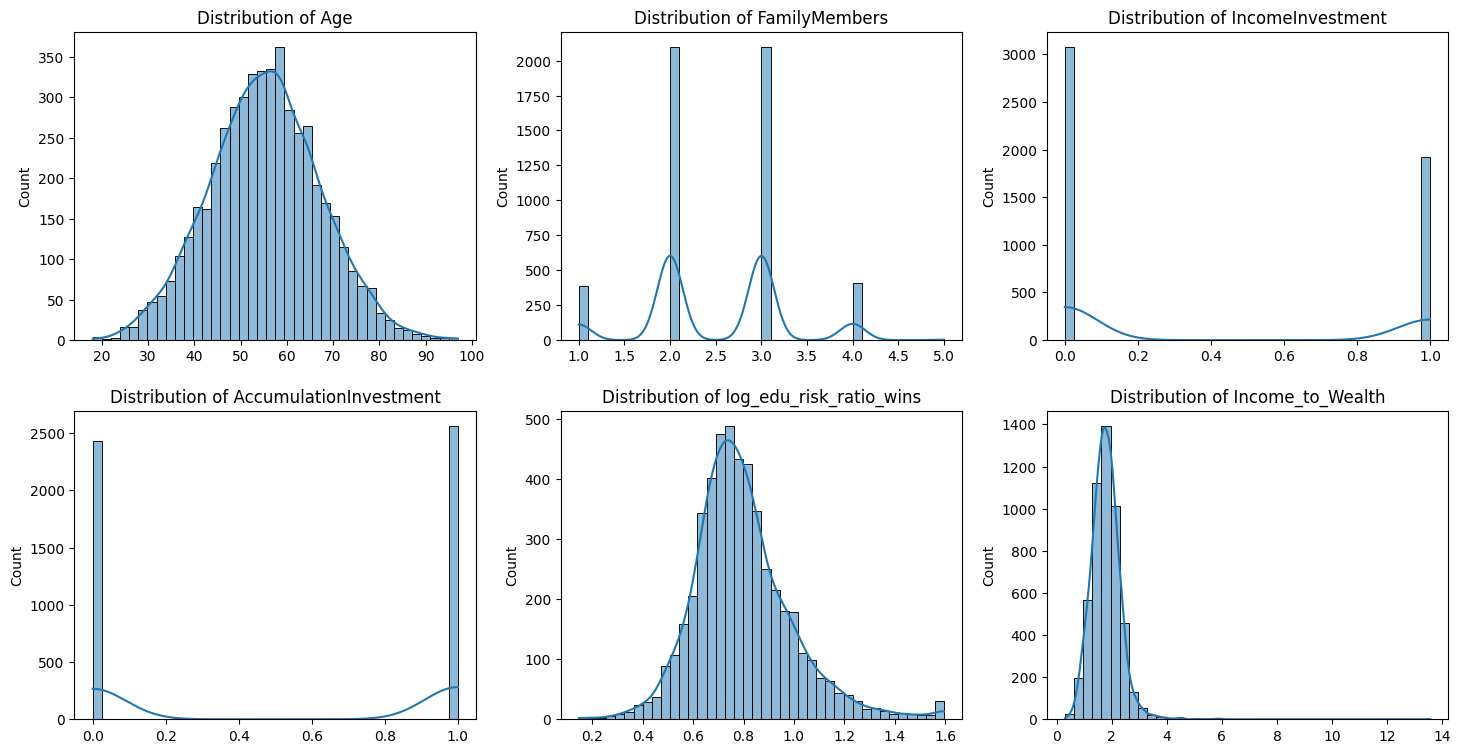

In [217]:
# Set up the subplot grid
n_cols = 3  # Number of columns in the grid
n_rows = (len(df_clients_transformed.columns) - 1) // n_cols + 1

# Create figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*4))
fig.tight_layout(pad=3.0)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each feature with custom bins
for i, column in enumerate(df_clients_transformed.columns):
    sns.histplot(
        df_clients_transformed[column], 
        kde=True, 
        ax=axes[i],
        bins=40  # <-- Adjust this number (default is 'auto')
    )
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel('')
    
# Hide any empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

# Encodage

In [214]:
df_clients_transformed_encoded = df_clients_transformed.copy()
Standard_columns = ["Age", "FamilyMembers"]